Го избрав множество со име „Water Quality“, кое може да го погледнете на следниов линк:https://www.kaggle.com/datasets/adityakadiwal/water-potability

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

### **Water Quality**






Katerina Donkova 183123

# 1.Предпроцесирање на податоците

In [132]:
#Библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
%matplotlib inline
import missingno as msno


#Split Data Train and Test
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV

#Моделирање
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA,IncrementalPCA

#Друго
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [133]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
#Читање на податоците
data=pd.read_csv("/content/drive/MyDrive/Proekt/water_potability.csv")
data.head()



ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [135]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


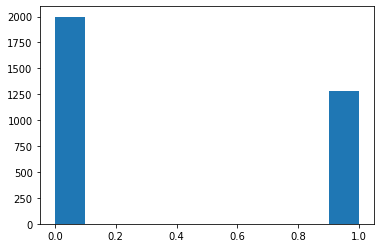

In [136]:
#Exploratory Data Analysis
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(data['Potability'],bins=10)
plt.show()

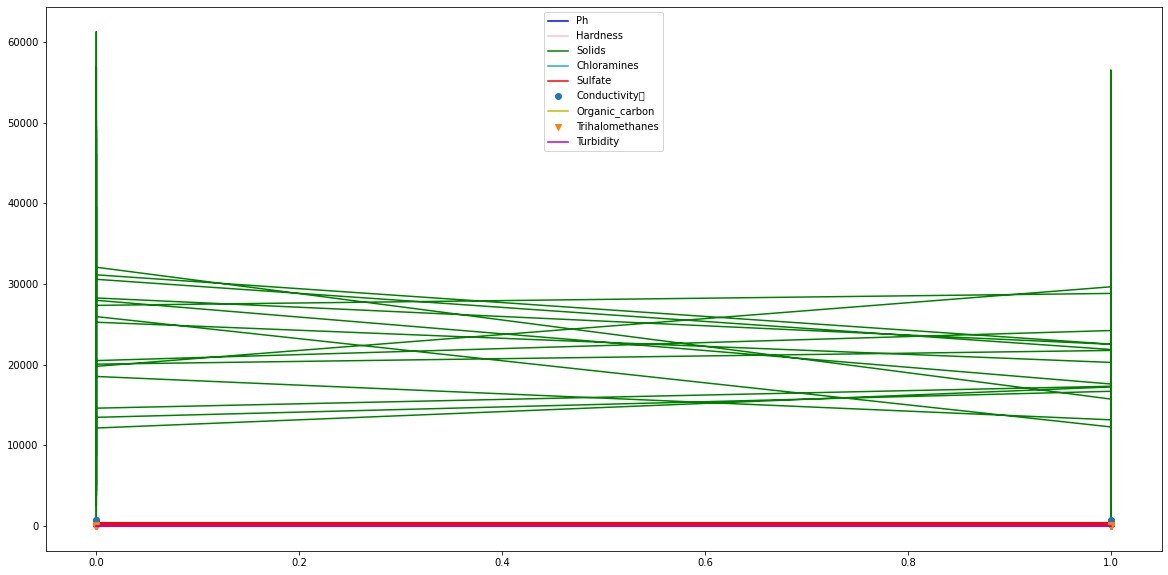

<Figure size 432x288 with 0 Axes>

In [137]:
#Complete Data exploration
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
x=data['Potability']
plt.plot(x,data['ph'],'b',label='Ph')
plt.plot(x,data['Hardness'],'pink',label='Hardness')
plt.plot(x,data['Solids'],'g',label='Solids')
plt.plot(x,data['Chloramines'],'lightseagreen',label='Chloramines')
plt.plot(x,data['Sulfate'],'r',label='Sulfate')
plt.plot(x,data['Conductivity'],'o',label='Conductivity	')
plt.plot(x,data['Organic_carbon'],'y',label='Organic_carbon')
plt.plot(x,data['Trihalomethanes'],'v',label='Trihalomethanes')
plt.plot(x,data['Turbidity'],'m',label='Turbidity')
plt.legend(loc=0)
plt.figure()
plt.show()

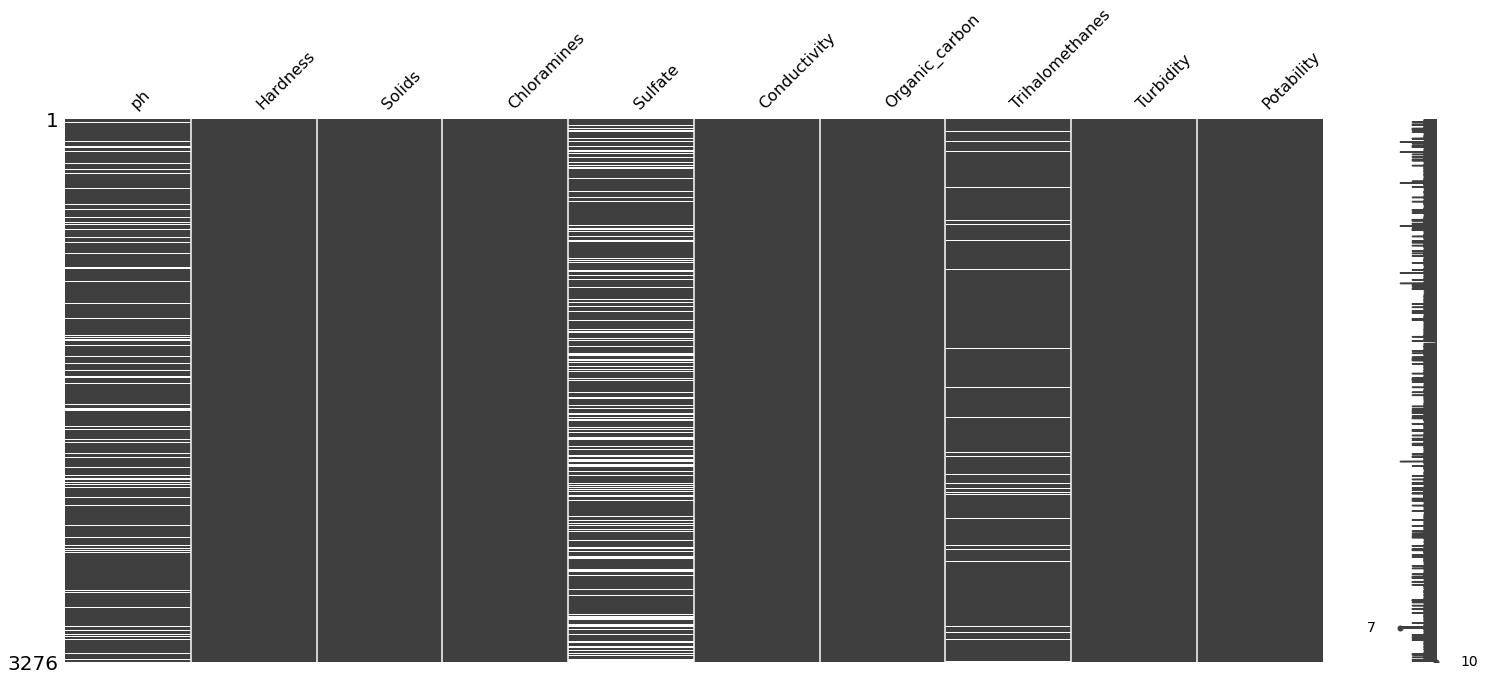

In [138]:
msno.matrix(data)


-Од следново можеме да забележеме дека имаме Missing Values

In [139]:
#Процентуална вредност на missing values
missing_values_data = data.isnull().sum()
percentage_train = 100 * data.isnull().sum() / len(data)
missing_values_table_data = pd.concat([missing_values_data, percentage_train], axis=1)
missing_values_table_data.columns = ['Num. of missing values','% of missing values']
missing_values_table_data

Num. of missing values  % of missing values
ph                                  491            14.987790
Hardness                              0             0.000000
Solids                                0             0.000000
Chloramines                           0             0.000000
Sulfate                             781            23.840049
Conductivity                          0             0.000000
Organic_carbon                        0             0.000000
Trihalomethanes                     162             4.945055
Turbidity                             0             0.000000
Potability                            0             0.000000

In [140]:
#Бришење дупликати
data.drop_duplicates(inplace=True)


# 2.Exploratory Data Analysis

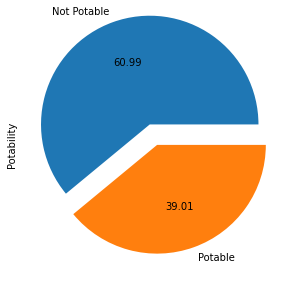

In [141]:
#Со овој график ќе бидиме колку водата е добра за конзумирање

plt.figure(figsize = (15,5))
my_explode = [0.2,0]
my_labels = ['Not Potable', 'Potable']
data['Potability'].value_counts().plot(kind = 'pie',autopct = '%.2f',explode= my_explode, labels = my_labels)

-60.99% водата не е за пиење

In [142]:
#Сега ќе ги извлечеме само карактеристиките на колоните

df = data.copy()
df.drop(columns = ['Potability'],inplace = True)

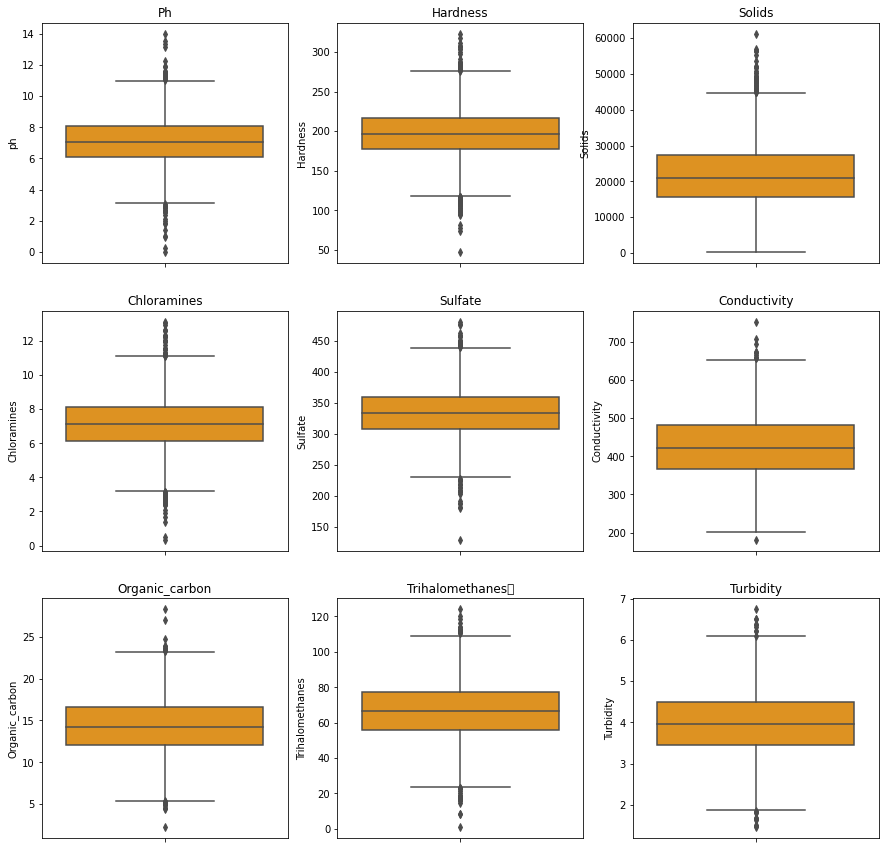

In [143]:
f, axes = plt.subplots(3, 3, figsize=(15, 15))
s=sns.boxplot(y=df.ph,ax=axes[0, 0],color="#FC9803")
axes[0, 0].set_title('Ph')
s=sns.boxplot(y=df.Hardness,ax=axes[0, 1],color="#FC9803")
axes[0, 1].set_title('Hardness')
s=sns.boxplot(y=df.Solids,ax=axes[0, 2],color="#FC9803")
axes[0, 2].set_title('Solids')

s=sns.boxplot(y=df.Chloramines,ax=axes[1, 0],color="#fc9803")
axes[1, 0].set_title('Chloramines')
s=sns.boxplot(y=df.Sulfate,ax=axes[1, 1],color="#fc9803")
axes[1, 1].set_title('Sulfate')
s=sns.boxplot(y=df.Conductivity,ax=axes[1, 2],color="#fc9803")
axes[1, 2].set_title('Conductivity')

s=sns.boxplot(y=df.Organic_carbon,	ax=axes[2, 0],color="#fc9803")
axes[2, 0].set_title('Organic_carbon')
s=sns.boxplot(y=df.Trihalomethanes,ax=axes[2, 1],color="#fc9803")
axes[2, 1].set_title('Trihalomethanes	')
s=sns.boxplot(y=df.Turbidity,ax=axes[2, 2],color="#fc9803")
axes[2, 2].set_title('Turbidity')
s.get_figure().savefig('boxplot subplots.png')
plt.show()

-Од овој график ќе забележаме дека имаме outliers

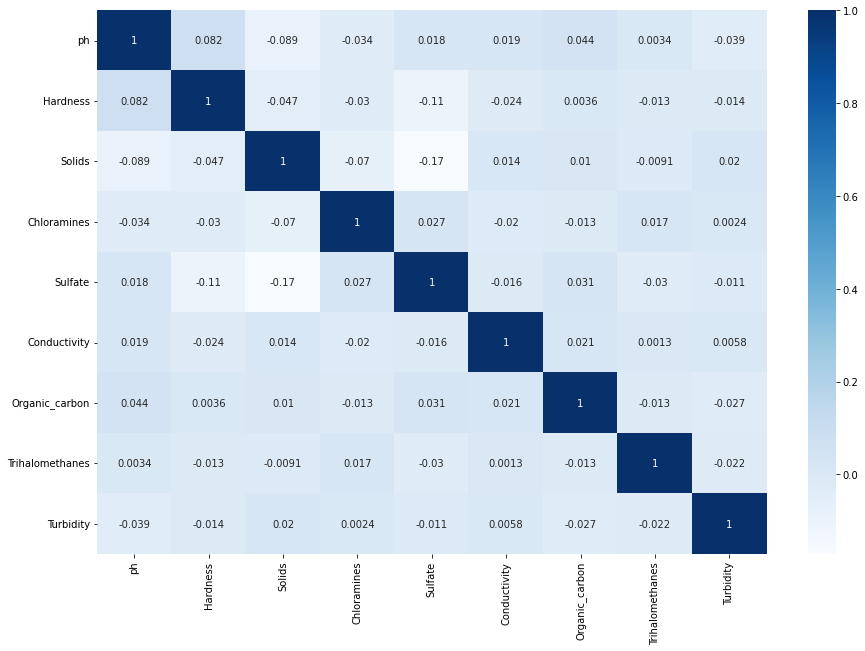

In [144]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues').get_figure().savefig('correlation_heatmap.png')

-Од овој график можеме да забележаме дека нема некоја голема корелација помеѓу податоците.

In [172]:
#Се справуваме со missing values со помош на додавањето на средна вредност.
data['ph'].fillna(df['ph'].mean(), inplace=True)
data['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)
data['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace=True)

# 3.Поделба на податоците и Нормализирање

In [173]:
from sklearn.model_selection import train_test_split
X = data.drop('Potability', axis=1).values
y = data['Potability'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [174]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



*Multiple Layer Perceptron model*



In [175]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [176]:
X_train.shape

(2293, 9)

In [177]:
y_train.shape

(2293,)

In [178]:
#Градење на моделот
model = Sequential()
#input
model.add(Dense(9, activation='relu'))
model.add(Dropout(0.2))

#hiden

model.add(Dense(7, activation='relu'))
model.add(Dropout(0.2))

# hiden 
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.2))

# output 
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [179]:
model.fit(x= X_train, y=y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
72/72 [==============================] - 1s 8ms/step - loss: 0.6849 - val_loss: 0.6730
Epoch 2/100
72/72 [==============================] - 0s 5ms/step - loss: 0.6758 - val_loss: 0.6702
Epoch 3/100
72/72 [==============================] - 0s 5ms/step - loss: 0.6721 - val_loss: 0.6691
Epoch 4/100
72/72 [==============================] - 0s 5ms/step - loss: 0.6741 - val_loss: 0.6684
Epoch 5/100
72/72 [==============================] - 0s 5ms/step - loss: 0.6723 - val_loss: 0.6680
Epoch 6/100
72/72 [==============================] - 0s 5ms/step - loss: 0.6738 - val_loss: 0.6688
Epoch 7/100
72/72 [==============================] - 0s 3ms/step - loss: 0.6711 - val_loss: 0.6687
Epoch 8/100
72/72 [==============================] - 0s 3ms/step - loss: 0.6720 - val_loss: 0.6681
Epoch 9/100
72/72 [==============================] - 0s 3ms/step - loss: 0.6709 - val_loss: 0.6672
Epoch 10/100
72/72 [==============================] - 0s 3ms/step - loss: 0.6718 - val_loss: 0.6665
Epoch 11/

In [180]:
#Евалуирање на моделот
losses = pd.DataFrame(model.history.history)
from sklearn.metrics import classification_report, confusion_matrix
predictions = (model.predict(X_test)> 0.5).astype('int32')


In [181]:
def metrics_class(y_test, predictions):
    
    print(confusion_matrix(y_test, predictions))
    print('\n')
    print(classification_report(y_test,predictions))

In [182]:
metrics_class(y_test,predictions)


[[580  23]
 [330  50]]


              precision    recall  f1-score   support

           0       0.64      0.96      0.77       603
           1       0.68      0.13      0.22       380

    accuracy                           0.64       983
   macro avg       0.66      0.55      0.49       983
weighted avg       0.66      0.64      0.56       983



*Prediction with XGBoost*

In [183]:
dataa=pd.read_csv("/content/drive/MyDrive/Proekt/water_potability.csv")

In [184]:
#Поделба на датасетот на Training и Test set
X = dataa.iloc[:, :-1].values
y = dataa.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [185]:
#Тренирање на XGBoost моделот на Training set
from xgboost import XGBClassifier
classifier = XGBClassifier(max_depth= 10, n_estimators= 125, random_state= 0,  learning_rate= 0.02, n_jobs=5)
classifier.fit(X_train, y_train)

XGBClassifier(learning_rate=0.02, max_depth=10, n_estimators=125, n_jobs=5)

In [186]:
#Предвидување на Test set резултатите
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 1]
 [0 1]
 [0 0]]


In [187]:
#Евалуирање на моделот
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[527  90]
 [238 128]]


0.6663275686673449

*Decision Tree Model*

In [188]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as li_reg
from sklearn.metrics import accuracy_score as acc_scr

In [189]:
#Градење на моделот

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, Y_train, Y_test = train_test_split( data[data.columns[:-1]],  data['Potability'], test_size=0.2)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [190]:
#Евалуирање на моделот

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.5777439024390244


*Naive Bayes Classification*

In [191]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( data[data.columns[:-1]],  data['Potability'], test_size=0.2)


In [192]:
# Градење на моделот
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,Y_train)

#Predict Output
y_pred= model.predict(X_test) # 0:Overcast, 2:Mild

In [193]:
#Евалуирање на моделот

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[352  53]
 [193  58]]
              precision    recall  f1-score   support

           0       0.65      0.87      0.74       405
           1       0.52      0.23      0.32       251

    accuracy                           0.62       656
   macro avg       0.58      0.55      0.53       656
weighted avg       0.60      0.62      0.58       656



5.Визуализација на Probility

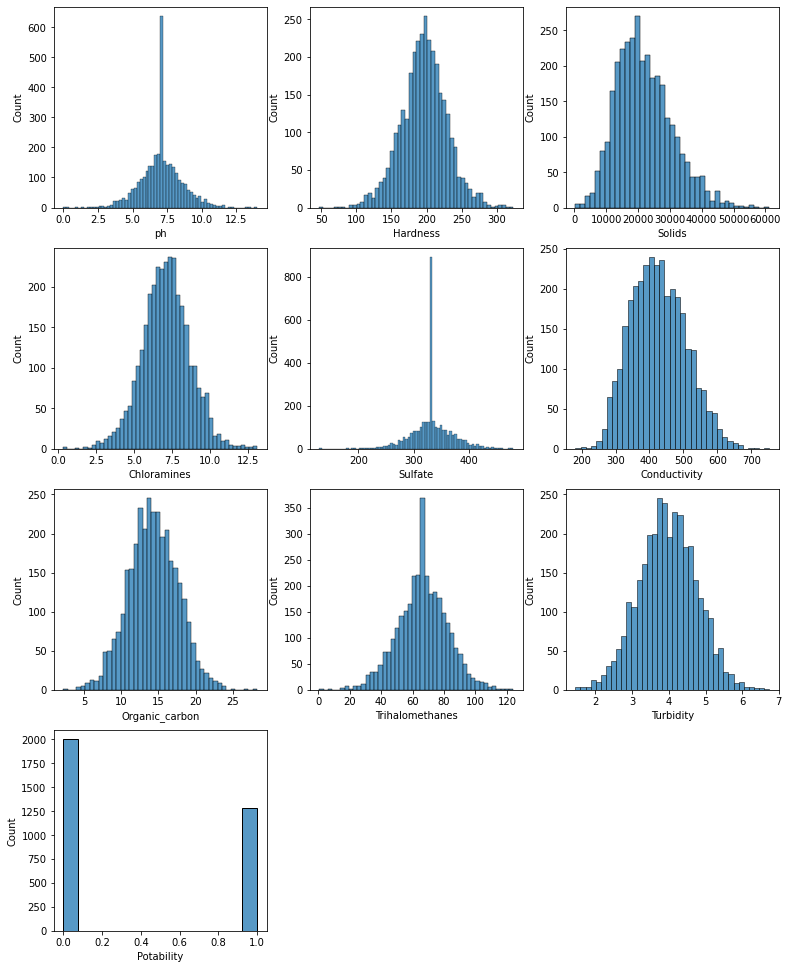

In [194]:
i=1
plt.figure(figsize = (13,17))
for col in data.columns:
    plt.subplot(4,3,i)
    sns.histplot(data[col])
    i+=1

-Анализирање на тоа како различните параметри влијаат на квалитетот на водата.

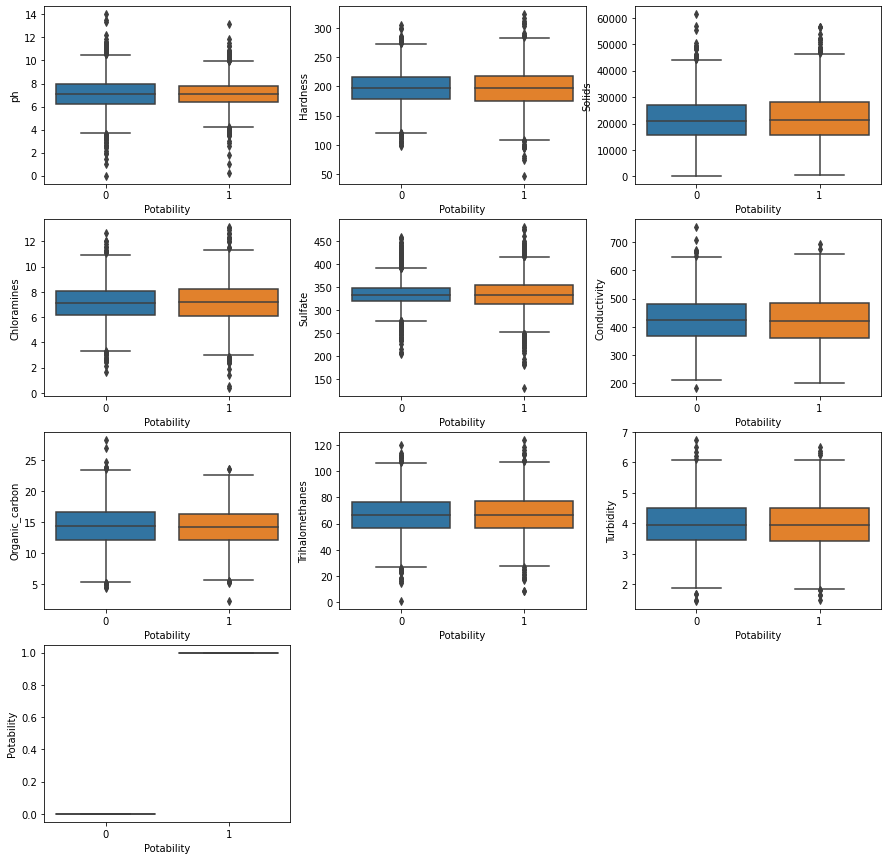

In [195]:
i=1
plt.figure(figsize=(15,15))
for col in dataa.columns:
    plt.subplot(4,3,i)
    sns.boxplot(y=data[col], x = data['Potability'])
    i+=1